# Coursework

## 1. a.	Use python to download its historical daily data via Yahoo Finance.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = yf.download('ADA-USD', start="2021-03-24", end="2022-03-24") #Cardano USD (ADA-USD)


[*********************100%***********************]  1 of 1 completed


In [3]:
data. describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,1.57,1.63,1.50,1.57,1.57,3.234401e+09
std,0.51,0.53,0.49,0.51,0.51,2.468367e+09
min,0.79,0.80,0.75,0.79,0.79,4.936061e+08
25%,1.20,1.25,1.17,1.20,1.20,1.570213e+09
50%,1.40,1.45,1.33,1.40,1.40,2.398235e+09
75%,1.99,2.04,1.92,1.99,1.99,4.112642e+09
max,2.97,3.10,2.91,2.97,2.97,1.631379e+10


## 1. b.	Show the movement of one major cryptocurrency for the one-year period. 

In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-20,0.901322,0.914603,0.865669,0.877092,0.877092,949951339
2022-03-21,0.877201,0.927599,0.865919,0.916782,0.916782,1233477886
2022-03-22,0.916888,0.985033,0.909592,0.976440,0.976440,1699537576
2022-03-23,0.976162,1.107482,0.959068,1.107482,1.107482,3447683427
2022-03-24,1.107204,1.185751,1.085422,1.130011,1.130011,3671006856


5 rows × 48 columns

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,1.121345,1.163652,1.056555,1.075002,1.075002,3759287517
2021-03-25,1.074466,1.152968,1.055945,1.101574,1.101574,5732698268
2021-03-26,1.101425,1.279076,1.098956,1.213969,1.213969,6325795912
2021-03-27,1.214082,1.236277,1.163149,1.176577,1.176577,3106871131
2021-03-28,1.176820,1.219583,1.169294,1.191124,1.191124,2397009016


In [6]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 1.13


array([<AxesSubplot:xlabel='Date'>], dtype=object)

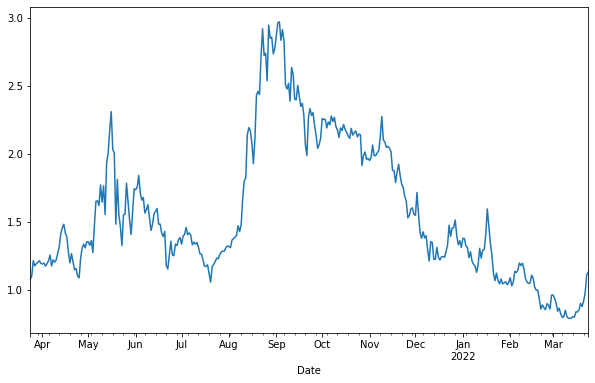

In [7]:
data['Adj Close'].plot(figsize=(10, 6), subplots=True)

# c.	Plot the movement (shape) of the cryptocurrency over this time period.

In [8]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
log_return.head()

Date
2021-03-24         NaN
2021-03-25    0.024418
2021-03-26    0.097155
2021-03-27   -0.031286
2021-03-28    0.012288
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

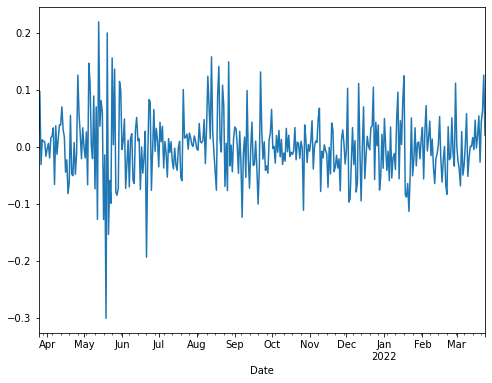

In [9]:
log_return.dropna(inplace=True)                #Volatility Clustering
log_return.plot(subplots=True, figsize=(8, 6))

# Calculate its volatility.

In [10]:
data.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-25,-0.046879,-0.010684,-0.000610,0.026572,0.026572,1.973411e+09
2021-03-26,0.026959,0.126108,0.043011,0.112395,0.112395,5.930976e+08
2021-03-27,0.112657,-0.042799,0.064193,-0.037392,-0.037392,-3.218925e+09
2021-03-28,-0.037262,-0.016694,0.006145,0.014547,0.014547,-7.098621e+08


In [11]:
data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,365.00,365.00,365.00,365.00,365.00,3.650000e+02
mean,-0.00,0.00,0.00,0.00,0.00,-2.418648e+05
std,0.10,0.08,0.11,0.10,0.10,1.601079e+09
min,-0.53,-0.31,-0.95,-0.52,-0.52,-6.859215e+09
25%,-0.05,-0.04,-0.04,-0.05,-0.05,-5.592886e+08
50%,0.00,-0.01,0.01,0.00,0.00,-6.953372e+07
75%,0.04,0.03,0.04,0.04,0.04,3.969310e+08
max,0.42,0.33,0.33,0.41,0.41,9.568965e+09


In [12]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
log_return.head().round(4)                  #Log return of Index

Date
2021-03-24       NaN
2021-03-25    0.0244
2021-03-26    0.0972
2021-03-27   -0.0313
2021-03-28    0.0123
Name: Adj Close, dtype: float64

In [13]:
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1)) 
#Creates a column called Log returns with the daily log return of the Close price.

In [14]:
data.pct_change().round(4).head()

,Open,High,Low,Close,Adj Close,Volume,log_return
Date,,,,,,,
2021-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-25,-0.0418,-0.0092,-0.0006,0.0247,0.0247,0.5249,NaN
2021-03-26,0.0251,0.1094,0.0407,0.1020,0.1020,0.1035,2.9789
2021-03-27,0.1023,-0.0335,0.0584,-0.0308,-0.0308,-0.5089,-1.3220
2021-03-28,-0.0307,-0.0135,0.0053,0.0124,0.0124,-0.2285,-1.3928


In [15]:
volatility1 = np.sqrt(365) * log_return[-182:-1].std()   # Set the time of half year
print('The annualised volatility is', round(volatility1*100,2), '%')

The annualised volatility is 87.01 %


In [16]:
volatility2 = np.sqrt(365) * log_return[-92:-1].std()     # Set the time of 3 Month
print('The annualised volatility is', round(volatility2*100,2), '%')

The annualised volatility is 95.88 %


In [17]:
volatility3= np.sqrt(365) * log_return[-31:-1].std()    #Set the time of 1 Month
print('The annualised volatility is', round(volatility3*100,2), '%')

The annualised volatility is 88.5 %


Considering the risks of cryptocurrency, we don't prefer long-term investment, so we don't calculate 1-year Volatility.

# 2. a.	Design a derivative and its associated pricing value using at least two methods which must be different. 

In [18]:
S0 = 1.1300             # spot Cardano price (2022.3.24)
K = 1.05                # strike (I set)
T = 1/12                # maturity (1 month)
r = 0.014               # risk free rate (6 month, 2022.3.29)
sig =  0.8701           # diffusion coefficient or volatility
N = 5                   # number of periods or number of time steps  
payoff = "put"          # payoff 

# Step 1: Create the binomial price tree

In [19]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [20]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [21]:
S

array([[1.13      , 1.26433597, 1.41464199, 1.58281659, 1.77098403,
        1.98152107],
       [0.        , 1.00993726, 1.13      , 1.26433597, 1.41464199,
        1.58281659],
       [0.        , 0.        , 0.9026312 , 1.00993726, 1.13      ,
        1.26433597],
       [0.        , 0.        , 0.        , 0.80672644, 0.9026312 ,
        1.00993726],
       [0.        , 0.        , 0.        , 0.        , 0.72101158,
        0.80672644],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.64440395]])

In [22]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47298368614633335

# Step 2: Find option value at each final node

In [23]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04006274],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24327356],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40559605]])

# Step 3: Find option value at earlier nodes

# European Option

In [24]:
# For European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.07390466, 0.02983377, 0.00586015, 0.        , 0.        ,
        0.        ],
       [0.        , 0.11348987, 0.05136269, 0.01112208, 0.        ,
        0.        ],
       [0.        , 0.        , 0.16929769, 0.08750035, 0.02110879,
        0.        ],
       [0.        , 0.        , 0.        , 0.24278367, 0.14712382,
        0.04006274],
       [0.        , 0.        , 0.        , 0.        , 0.32874344,
        0.24327356],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40559605]])

In [25]:
print('European ' + payoff +' is', str( V[0,0]))     #Today's value

European put is 0.0739046550854255


# Monte Carlo Simulation

In [26]:
def montecarlos_simulation_np(m,n):
    M = m                               #number of steps
    I = n                               #number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S

In [27]:
T = 1/12
r = 0.014
sig = 0.8701
S0 = 1.1300
K = 1.05

In [28]:
S = montecarlos_simulation_np(180,10000)        #180 steps, 10000 simulations 

In [29]:
S = np.transpose(S)
S

array([[1.13      , 1.13493894, 1.14048514, ..., 1.3766485 , 1.36829227,
        1.35089412],
       [1.13      , 1.13926998, 1.11086872, ..., 1.74765646, 1.68904562,
        1.67787995],
       [1.13      , 1.1207098 , 1.10625929, ..., 1.30212922, 1.34515097,
        1.31269285],
       ...,
       [1.13      , 1.13400612, 1.15246448, ..., 0.94503291, 0.94563889,
        0.95971312],
       [1.13      , 1.13322249, 1.10216653, ..., 0.95630336, 0.95826155,
        0.93842035],
       [1.13      , 1.11098482, 1.14740589, ..., 0.89405475, 0.91949879,
        0.91314569]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

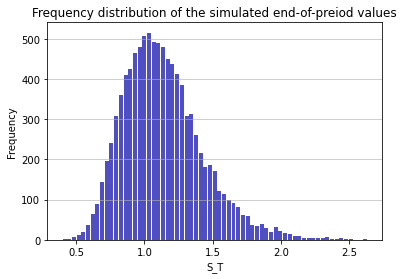

In [30]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [31]:
p = np.mean(np.maximum(K - S[:,-1],0))         #European put Price in 1 month
print('European put'+' is',str(p) )

European put is 0.07188224668488218


In [32]:
p = np.mean(np.maximum(K - S[:,-1],0))*np.exp(-r*T)  #European put Present value
print('European put', str(p))

European put 0.0717984329645933


Compared with Previous value in Binominal tree, which is 0.0739046550854255

# 3.Calculate and Explain its Greeks.

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as si

In [34]:
def euro_option_bsm(S, K, T, r, vol):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    (d2, 0.0, 1.0)
    if payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [35]:
euro_option_bsm(1.13, 1.05, 1/12, 0.014, 0.8701) 

0.09090258116896616

In [36]:
S = np.linspace(0.5,1.5,11)   #change spot price from $0.5 to $1.5; 11 prices in total;
Put = np.zeros((len(S),1))
for i in range(len(S)):      
    Put [i] = euro_option_bsm(S[i], 1.05, 1/12, 0.014, 0.8701)

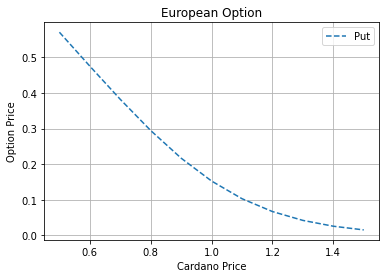

In [37]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Cardano Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [38]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-0 * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [39]:
delta(1.13, 1.05, 1/12, 0.014, 0, 0.8701,'put')

-0.33630546192953037

The Delta is -0.336, when the price of Cardano increase (decrease) by $1, the option value will increase (decrease) by -0.336 dollars.

In [40]:
S = np.linspace(0.5,1.5,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 1.05, 1/12, 0.0014, 0, 0.8701, 'put')

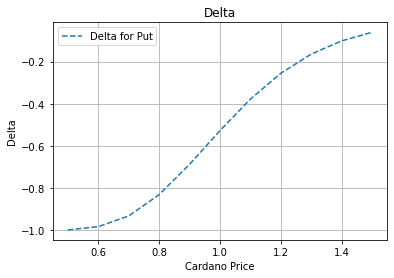

In [41]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Cardano Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

When the Cardano is increasing, the Delta is increasing. 

In [42]:
S = np.linspace(0.5,1.5,11)
T = np.linspace(1/52, 1/12, 11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1.05, T[i], 0.014, 0, 0.8701, 'put')

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_34098/2891367668.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


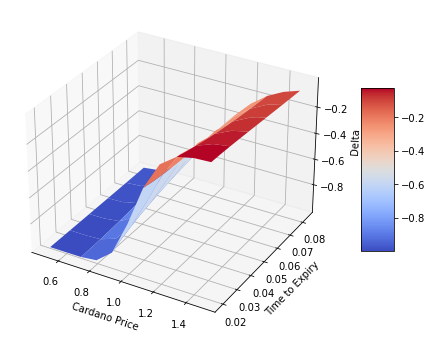

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [44]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- 0 * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [45]:
gamma(1.13, 1.05, 1/12, 0.014, 0, 0.8701, 'put')

1.2855192100496886

The gamma is 1.2855, when Underlying Asset price increases (decreases) $1, the Delta will increase 1.2855.

In [46]:
S = np.linspace(0.5,1.5,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 1.05, 1/12, 0.014, 0, 0.8701, 'put')

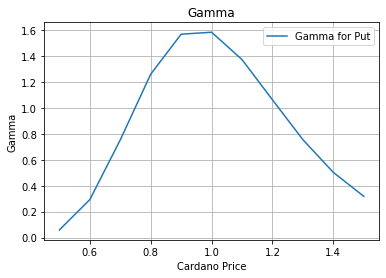

In [47]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Cardano Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

The Gamma is very sensitive at-the-money, when strike price is equal to current market price.
ITM/OTM: The Gamma is not sensitive in-the-money and out-of-the-money.

In [48]:
S = np.linspace(0.5,1.5,11)
T = np.linspace(1/52, 1/12, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1.05, T[i], 0.014, 0, 0.8701, 'put')

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_34098/1235122209.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


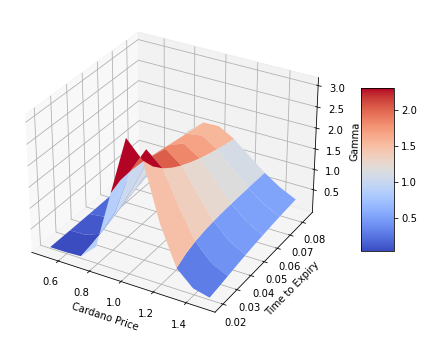

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [50]:
def speed(S, K, T, r, q, vol,payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-0 * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [51]:
speed(1.13, 1.05, 1/12, 0.014, 0, 0.8701, 'put')

-0.8808980056194192

If the price of Cardano increases by $1, the Gamma will decrease 0.8808.

In [52]:
S = np.linspace(0.5,1.5,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 1.05, 1/12, 0.014, 0, 0.8701, 'put')

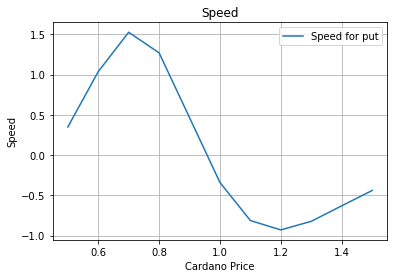

In [53]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Cardano Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for put'])

The Speed is Positive when Cardano Price is under around $0.85;

The Speed is Negative when Cardano Price is over around $0.85;

Positive means when UA increases, Gamma increases; Negative means when UA increase, Gamma decreases.

When Cardano increases, Gamma decreases, Speed is negative.

# Surface of Speed

In [54]:
S = np.linspace(0.5,1.5,11)
T = np.linspace(1/52, 1/12, 11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 1.05, T[i], 0.014, 0, 0.8701, 'put')

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_34098/1495316100.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


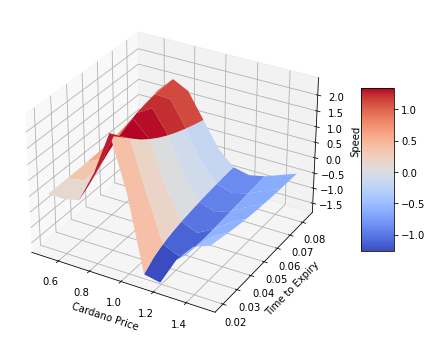

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [56]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0 - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-0 * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - 0 * S * np.exp(-0 * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-0 * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - 0 * S * np.exp(-0 * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [57]:
theta(1.13, 1.05, 1/12, 0.014, 0, 0.8701, 'put')

0.6277031062470043

When the price of Cardano decreases by $1/365,

its option value will decrease by $0.6277/365 = $0.0017 dollars

In [58]:
T = np.linspace(1/52, 1/12, 11)           #Time is from 1 week to 1 month
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(1.13, 1.05, T[i], 0.014, 0, 0.8701, 'put')

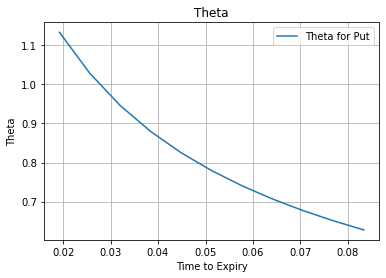

In [59]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

As it's closer to expiration time, the Theta is decreasing, means that option is losing value.

In [60]:
S = np.linspace(0.5, 1.5, 11)
T = np.linspace(1/52, 1/12, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 1.05, T[i], 0.014, 0, 0.8701, 'put')

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_34098/1632387056.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


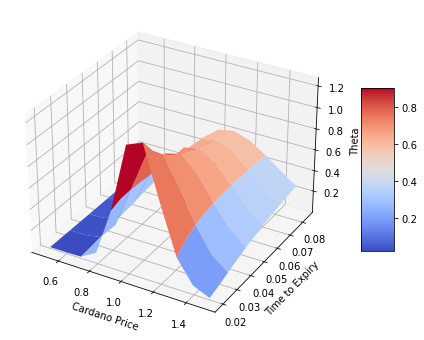

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [62]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0 - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [63]:
rho(1.13, 1.05, 1/12, 0.014, 0, 0.8701, 'put')

-0.037752264161376135

If the risk-free rate is increased by 1.4%, the option value will decrease 0.0000518 dollars.

In [64]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(1.13, 1.05, 1/12, r[i], 0, 0.8701, 'put')

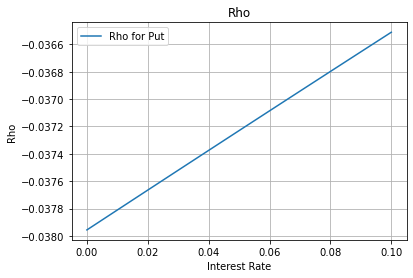

In [65]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

As interest rate increases, the Rho is increasing.

# Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [66]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-0 * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [67]:
vega(1.13, 1.05, 1/12, 0.014, 0, 0.8701, 'put')

0.11902094124581332

If there is 1% increase in volatility, the option value will increase  $0.00119. 

In [68]:
vol = np.linspace(0.7,0.9,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(1.13, 1.05, 1/12, 0.014, 0, vol[i], 'put')

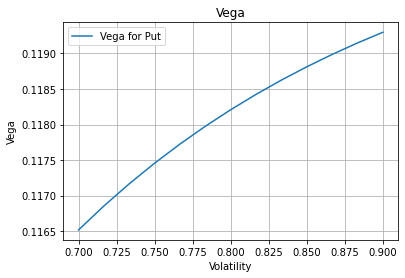

In [69]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

As volatility is bigger, the Vega is increasing.

In [70]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - 0 + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-0 * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [71]:
S = np.linspace(0.5,1.5,11)
T = np.linspace(1/52, 1/12, 11)                    #1 Week to 1 Month
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 1.05, T[i], 0.014, 0, 0.8701, 'put')

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_34098/593986260.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


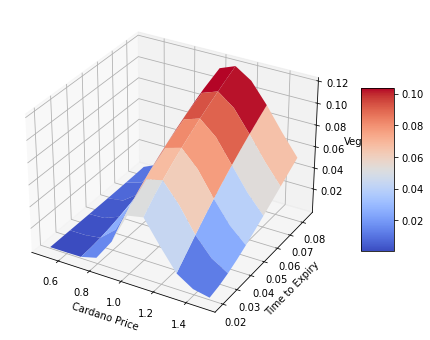

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Cardano Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);